In [156]:
PROJECT_ROOT = '..'
PLOTS_PATH = f'{PROJECT_ROOT}/plots'
CSV_FOLDER = 'csv'
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

%run _utils.ipynb

library_versions = load_library_versions()
library_releases = load_library_releases()

## Frequency of Packages Releases


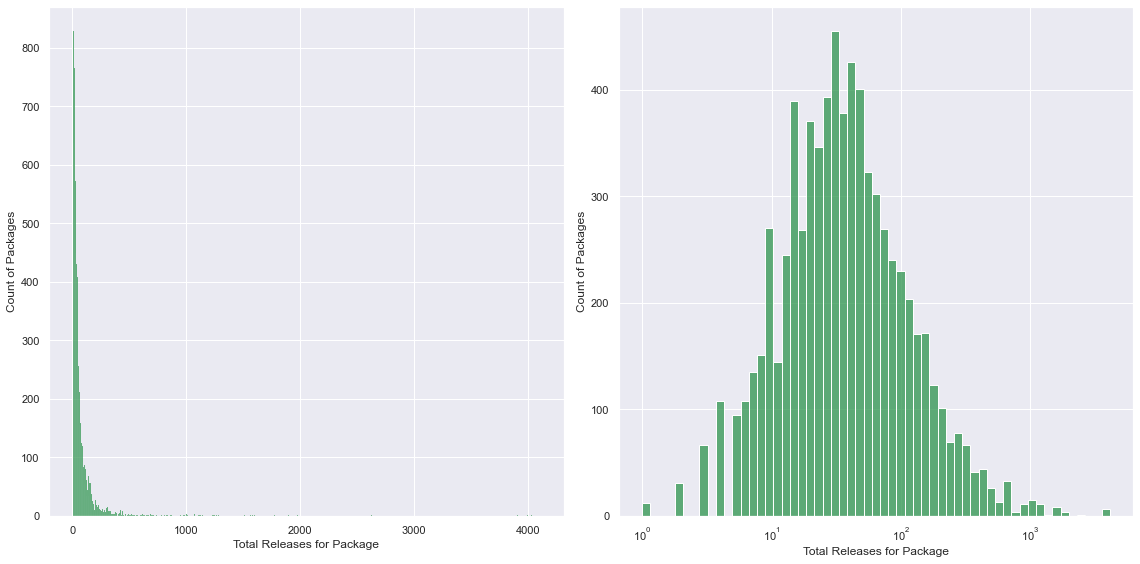

In [157]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

params = dict(
    data=library_releases['total_releases'],
    color=GK_GREEN,
)

sns.histplot(
    **params,
    ax=ax1,
    log_scale=(False, False),
)
ax1.set_xlabel('Total Releases for Package')
ax1.set_ylabel('Count of Packages')

g = sns.histplot(
    **params,
    ax=ax2,
    log_scale=(True, False),
)
ax2.set_xlabel('Total Releases for Package')
ax2.set_ylabel('Count of Packages')
fig.tight_layout()

### Number of Releases & Release Frequency vs Number of Breakages

In [158]:
total_releases_for_plot = library_releases[
    (library_releases['total_releases'] > 0) &
    (library_releases['broken_builds_caused'] > 0)
].copy()
total_releases_for_plot['log_total_releases'] = np.log10(total_releases_for_plot['total_releases'])
total_releases_for_plot['log_breaks'] = np.log10(total_releases_for_plot['broken_builds_caused'])


release_frequency_for_plot = library_releases.copy()
release_frequency_for_plot['freq'] = \
    release_frequency_for_plot['avg_time_between_releases'].astype('timedelta64[s]')
release_frequency_for_plot = release_frequency_for_plot.loc[
    (release_frequency_for_plot['total_releases'] >= 15) &
    (release_frequency_for_plot['freq'] > 0) &
    (release_frequency_for_plot['broken_builds_caused'] > 0)
].copy()

release_frequency_for_plot['log_freq'] = np.log10(release_frequency_for_plot['freq'])
release_frequency_for_plot['log_breaks'] = np.log10(release_frequency_for_plot['broken_builds_caused'])

In [159]:
release_frequency_for_plot['broken_builds_caused'].describe()

count    5856.000000
mean       19.325990
std       127.725039
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      5202.000000
Name: broken_builds_caused, dtype: float64

In [160]:
total_releases_for_plot['broken_builds_caused'].describe()

count    7360.000000
mean       15.821875
std       114.159336
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      5202.000000
Name: broken_builds_caused, dtype: float64

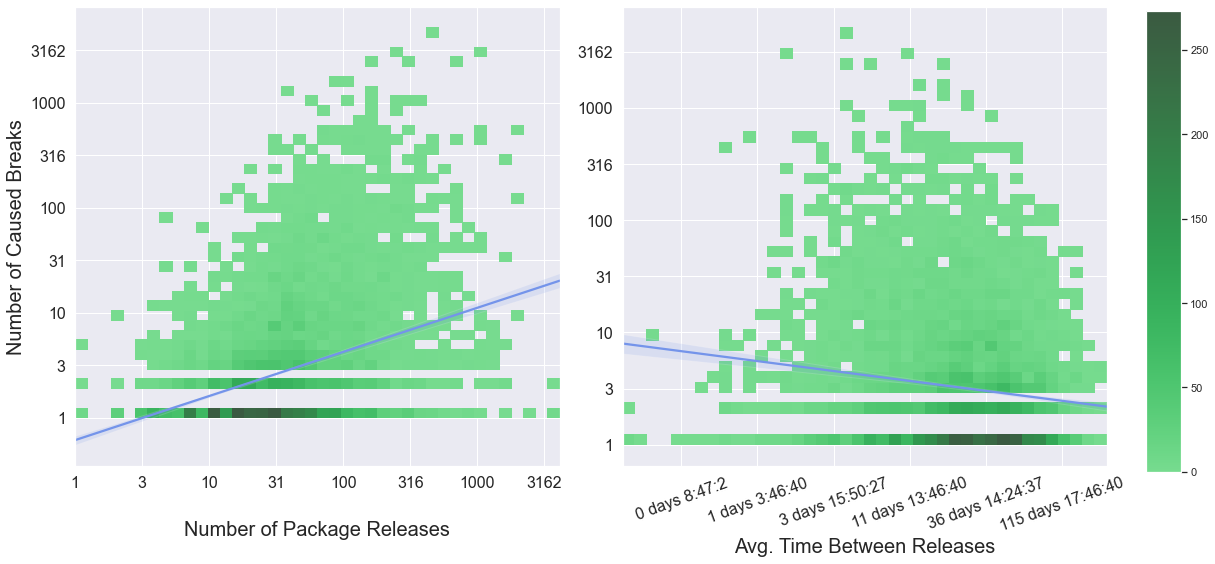

In [161]:
sns.set()
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
cbar_ax_1 = fig.add_axes([1, 0.17, .03, 0.8])
# cbar_ax_1 = fig.add_subplot([1, 0.17, .03, 0.8])

params_1 = dict(
    data=total_releases_for_plot,
    x="log_total_releases",
    y="log_breaks",
)
params_1_reg = dict(
    data=total_releases_for_plot,
    x="total_releases",
    y="broken_builds_caused",
)
ax_1 = create_hist_plot(
    params_1,
    ax_1,
    cbar_ax=cbar_ax_1,
    color=TWO_COLOUR_PALETTE[0],
    bins=BINS_COUNT
)
ax_1 = create_reg_line(params_1, ax_1)
ax_1.set_title(f'', fontsize=20)
ax_1.set_xlabel(f'Number of Package Releases', fontsize=20, labelpad=30)
ax_1.set_ylabel('Number of Caused Breaks', fontsize=20)
ax_1.set_yticklabels([int(10 ** y) for y in ax_1.get_yticks()], size=16)
ax_1.set_xticklabels([int(10 ** x) for x in ax_1.get_xticks()], size=16)
ax_1.set_ylim()

params_2 = dict(
    data=release_frequency_for_plot,
    x="log_freq",
    y="log_breaks",
)
bins = [
    40,
    np.linspace(ax_1.get_ylim()[0], ax_1.get_ylim()[1], BINS_COUNT)
]
ax_2 = create_hist_plot(
    params_2,
    ax_2,
    color=TWO_COLOUR_PALETTE[0],
    bins=BINS_COUNT
)
ax_2 = create_reg_line(params_2, ax_2)
ax_2.set_title(f'', fontsize=20)
ax_2.set_xlabel(f'Avg. Time Between Releases', fontsize=20)
ax_2.set_ylabel('', fontsize=20)
ax_2.set_yticklabels([int(10 ** y) for y in ax_2.get_yticks()], size=16)
x_seconds = [10 ** x for x in ax_2.get_xticks()]
xlabels = [strfdelta(x, "{days} days {hours}:{minutes}:{seconds}") for x in pd.to_timedelta(x_seconds, unit='s')]
ax_2.set_xticklabels(xlabels, rotation=20, size=16)
ax_2.set_ylim()


fig.tight_layout()
plt.show()


## Total Package Releases vs. Caused Breaks

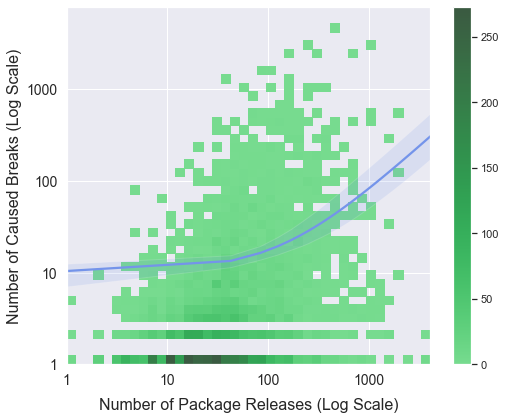


Coefficients of a 1-degree polynomial that is the least squares fit:
	 intercept = 10.348743872896742
	 coefficient = 0.07235365294720608
	 residuals = [94644179.09735073]
	 rank = 2
	 singular_values = [1.17719201 0.78372123]
	 rcond = 1.6342482922482304e-12
	 r2_score = 0.013147522566800851



In [168]:
sns.set()
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 6))

params = dict(
    data=total_releases_for_plot,
    x="total_releases",
    y="broken_builds_caused",
)

ax_1 = sns.histplot(
    **params,
    ax=ax_1,
    kde=True,
    bins=BINS_COUNT,
    color=GK_GREEN,
    cbar=True,
    log_scale=True,
)

ax_1 = sns.regplot(
    **params,
    scatter=False,
    line_kws={"color": GK_PURPLE},
    ax=ax_1,
)

ax_1.set_title(f'', fontsize=20)
ax_1.set_xlabel(f'Number of Package Releases (Log Scale)', fontsize=16, labelpad=10)
ax_1.set_ylabel(f'Number of Caused Breaks (Log Scale)', fontsize=16)
ax_1.set_ylim(1, None)
ax_1.set_yticklabels([int(y) for y in ax_1.get_yticks()], size=14)
ax_1.set_xticklabels([int(x) for x in ax_1.get_xticks()], size=14)

fig.tight_layout()
plt.show()

save_plot(fig, f'{PLOTS_PATH}/package_releases_vs_caused_breaks.png')

# Least-squares fit of a polynomial to data.
# Return the coefficients of a polynomial of degree deg that 
# is the least squares fit to the data values y given at points x
x = total_releases_for_plot['total_releases']
y = total_releases_for_plot['broken_builds_caused']
degree = 1
fit_info = poly.polyfit(x, y, degree, full=True)
intercept = fit_info[0][0]
coef = fit_info[0][1]
residuals = fit_info[1][0]
rank = fit_info[1][1]
singular_values = fit_info[1][2]
rcond = fit_info[1][3]

predict = poly.Polynomial(fit_info[0]) 
r2 = r2_score(y, predict(x))

# resid – sum of squared residuals of the least squares fit 
# rank – the numerical rank of the scaled Vandermonde matrix 
# sv – singular values of the scaled Vandermonde matrix 
# rcond – value of rcond
s = f'''
Coefficients of a 1-degree polynomial that is the least squares fit:
\t intercept = {intercept}
\t coefficient = {coef}
\t residuals = {residuals}
\t rank = {rank}
\t singular_values = {singular_values}
\t rcond = {rcond}
\t r2_score = {r2}
'''
print(s)


## Time Between Releases vs. Caused Breaks

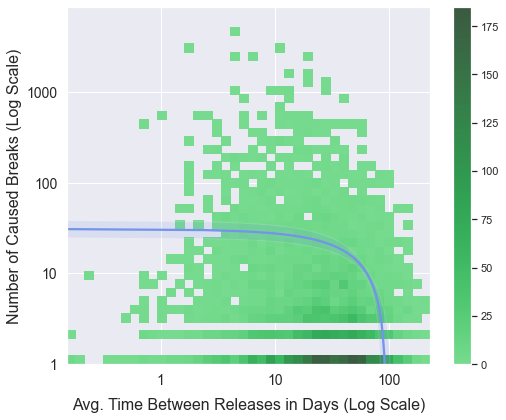


Coefficients of a 1-degree polynomial that is the least squares fit:
	 intercept = 30.872278960420555
	 coefficient = -3.799852766912048e-06
	 residuals = [94959360.53444429]
	 rank = 2
	 singular_values = [1.32810774 0.48593191]
	 rcond = 1.3002932064409833e-12
	 r2_score = 0.005834252710629206



In [170]:
sns.set()
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 6))

params = dict(
    data=release_frequency_for_plot,
    x="freq",
    y="broken_builds_caused",
)

ax_1 = sns.histplot(
    **params,
    ax=ax_1,
    kde=True,
    bins=BINS_COUNT,
    color=GK_GREEN,
    cbar=True,
    log_scale=True,
)

ax_1 = sns.regplot(
    **params,
    scatter=False,
    line_kws={"color": GK_PURPLE},
    ax=ax_1,
)

ax_1.set_title(f'', fontsize=20)
ax_1.set_xlabel(f'Avg. Time Between Releases in Days (Log Scale)', fontsize=16, labelpad=10)
ax_1.set_ylabel(f'Number of Caused Breaks (Log Scale)', fontsize=16)

ax_1.set_ylim(1, None)
ax_1.set_yticklabels([int(y) for y in ax_1.get_yticks()], size=14)

seconds_in_a_day = 86400
default_domain = ax_1.get_xlim()
x_days_nice = [
    0.1,
    1,
    10,
    100,
    1000,
]
x_seconds_nice = [x_d_n * seconds_in_a_day for x_d_n in x_days_nice]
ax_1.set_xticks(x_seconds_nice)
# new_x_seconds = [int(x) for x in ax_1.get_xticks()]
# x_labels = [strfdelta(x, "{days} days {hours}:{minutes}:{seconds}") for x in pd.to_timedelta(new_x_seconds, unit='s')]
x_labels = [int(x / seconds_in_a_day) for x in ax_1.get_xticks()]
ax_1.set_xticklabels(x_labels, size=14)
ax_1.set_xlim(default_domain)


fig.tight_layout()
plt.show()

save_plot(fig, f'{PLOTS_PATH}/time_between_releases_vs_caused_breaks.png')


# Least-squares fit of a polynomial to data.
# Return the coefficients of a polynomial of degree deg that 
# is the least squares fit to the data values y given at points x
x = release_frequency_for_plot['freq']
y = release_frequency_for_plot['broken_builds_caused']
degree = 1
fit_info = poly.polyfit(x, y, degree, full=True)
intercept = fit_info[0][0]
coef = fit_info[0][1]
residuals = fit_info[1][0]
rank = fit_info[1][1]
singular_values = fit_info[1][2]
rcond = fit_info[1][3]

predict = poly.Polynomial(fit_info[0]) 
r2 = r2_score(y, predict(x))

# resid – sum of squared residuals of the least squares fit 
# rank – the numerical rank of the scaled Vandermonde matrix 
# sv – singular values of the scaled Vandermonde matrix 
# rcond – value of rcond
s = f'''
Coefficients of a 1-degree polynomial that is the least squares fit:
\t intercept = {intercept}
\t coefficient = {coef}
\t residuals = {residuals}
\t rank = {rank}
\t singular_values = {singular_values}
\t rcond = {rcond}
\t r2_score = {r2}
'''
print(s)
